## Basic test #1 with PyNufft Repo
Test code for pynufft using the examples on the github repo: https://github.com/pynufft/pynufft.git.

(64, 64)
(1096, 1024)


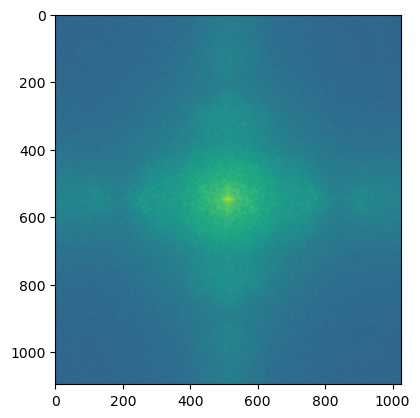

In [8]:
from pynufft import NUFFT
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


A = NUFFT()
om = np.random.randn(10,2)
Nd = (64,64)
Kd = (128,128)
Jd = (6,6)
A.plan(om, Nd, Kd, Jd)
x=np.random.randn(*Nd)
print(x.shape)

y = A.forward(x)

##
img=mpimg.imread('MRI_of_Human_Brain.jpg')
print(img.shape)

img_fft = np.fft.fftshift(np.fft.fft2(img))
plt.figure
plt.imshow(np.log(abs(img_fft)))
#print(img_fft)
#np.abs(img_fft)

## Basic test #2 with PyNufft Repo
Test code for pynufft using the examples on the github repo: https://github.com/pynufft/pynufft.git.

loading image...
image shape =  (256, 256)


/tmp/ipykernel_3698485/3161270774.py:7: DeprecationWarning: scipy.misc.ascent has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.ascent instead.
  image = scipy.misc.ascent()[::2, ::2]


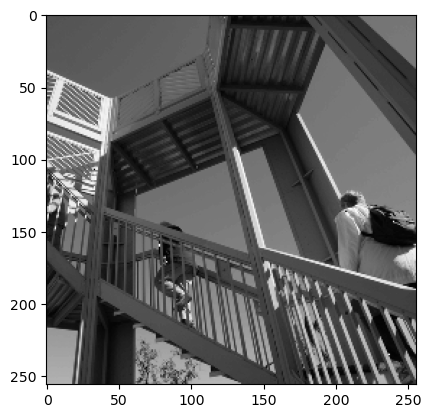

om shape =  (122880, 2)
y shape:  (12288,)


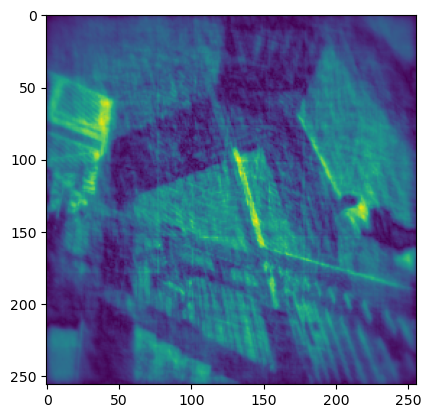

In [9]:
from pynufft import NUFFT
import matplotlib
import scipy
import pkg_resources
A = NUFFT()

image = scipy.misc.ascent()[::2, ::2]
image=image/np.max(image[...])

print('loading image...')
print("image shape = ", image.shape)

plt.imshow(image.real, cmap=matplotlib.cm.gray)
plt.show()

DATA_PATH = pkg_resources.resource_filename('pynufft', './src/data/')
om = np.load(DATA_PATH+'om2D.npz')['arr_0']
every_tenth_entry = om[::10]
# plt.plot(every_tenth_entry[::,0], every_tenth_entry[::,1], 'x') 

print("om shape = ", om.shape)
Nd = (256, 256)
Kd = (256*2, 256*2)
Jd = (6,6)
A.plan(every_tenth_entry, Nd, Kd, Jd)
x = image
# x =mpimg.imread('MRI_of_Human_Brain.jpg')
y = A.forward(x)
print("y shape: ", y.shape)
im0 = A.solve(y, solver='cg', maxiter=10)
plt.imshow(np.abs(im0))

## Golden Angle Sampling Test Code
Create Golden Angle Sampling trajectory using PyNufft. 

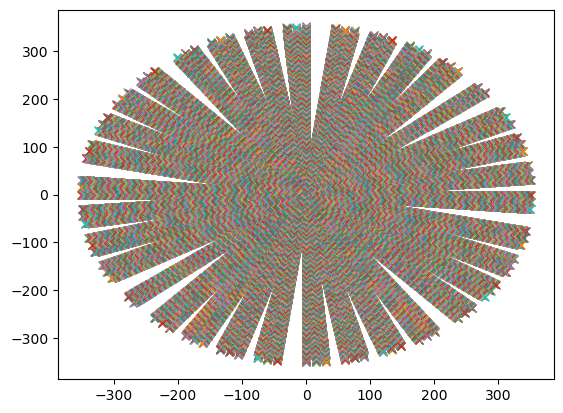

In [10]:
# generating 2D radial coordinates
import numpy
import math

# Initialize lists to store x and y values
xs =[]
ys=[]
om = []

for spoke in range(50):
    for k in range(-352,352):
        x = k * math.cos(math.radians(137.5 * spoke))
        y = k * math.sin(math.radians(137.5 * spoke))
        plt.plot(x,y, 'x')
        om.append([x,y])

## Use Golden Angle Sampling to use PyNufft 
Use om from above along with image data loaded from matlab to reconstruct image

Image loaded from .mat:  (704, 50, 38)
om shape:  (35200, 2)
x shape:  (704, 50)
Nd shape:  (256, 256)
Kd shape:  (704, 50)
y shape:  (35200,)


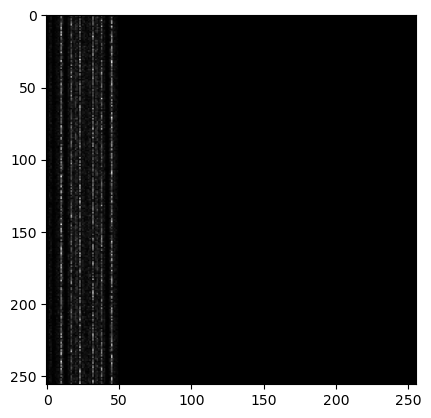

In [11]:
from pynufft import NUFFT
import matplotlib
import scipy
import pkg_resources

## DATA LOADING
import sys
sys.path.append('/home/lilianae/projects/jointrecon-mtsinai/')
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

## Load Matlab Data
data = loadmat('test_data_Jan.mat')
im_data = data['img_rshp_fixed']  
im_data_fft = data['img_fft']
im_rshp = np.reshape(im_data, [704, 1600, 38])

plt.imshow(np.abs(im_rshp[:,:,1]))

## Take first 50 slices 
im_rshp = im_rshp[:, 0:50, :]
print("Image loaded from .mat: ", im_rshp.shape)

# Create NUFFT operator
A = NUFFT()
# Load in sampling trajectory
om = np.array(om)
print("om shape: ", om.shape)
# Single slice from our 3D data
x = im_rshp[:,:,1]
print("x shape: ", x.shape)
# Image dimensions
Nd = (256, 256)
print("Nd shape: ", Nd)
# K-space dimensions
Kd = (x.shape[0], x.shape[1])
print("Kd shape: ", Kd)
# Interpolator size
Jd = (6,6)
A.plan(om, Nd, Kd, Jd)

y = np.ndarray.flatten(im_rshp[:,:,1])
print("y shape: ", y.shape)
im0 = A.solve(y, solver='cg', maxiter=100)
plt.imshow(abs(im0), cmap=matplotlib.cm.gray)
